### Importing Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import curve_fit
import math

### Loading the data

In [2]:
data = pd.read_csv("C:\\Users\\Ahzam Ahmed\\Downloads\\SNe_KunnathChali.csv")

Plot of apparent magnitude against redshift for all the SNe.

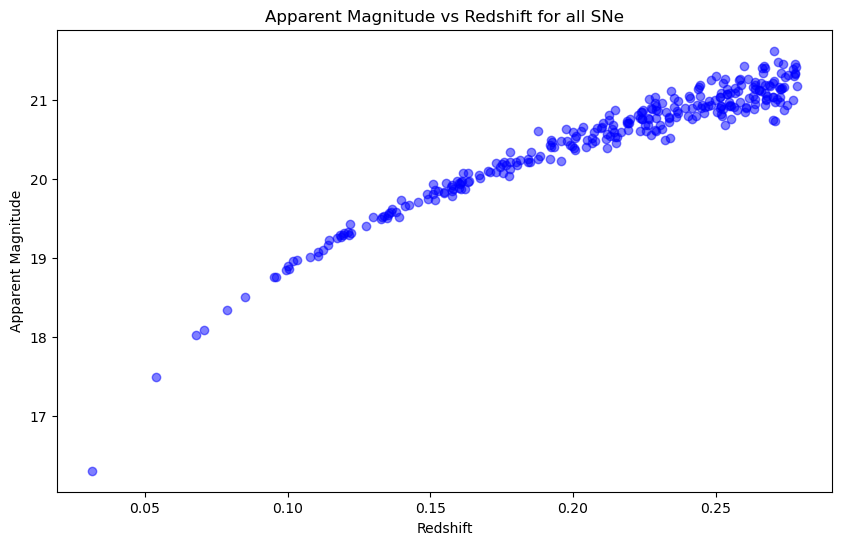

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Redshift'], data['AppMag'],marker='o', color='blue', alpha=0.5)
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift for all SNe')
plt.show()

Luminosity distance (dL) of the lowest redshift SNe in the catalogue.

In [4]:
lowest_redshift = data['Redshift'].min()
app_mag_lowest_redshift = data.loc[data['Redshift'] == lowest_redshift].iloc[0]
app_mag_lowest_redshift = app_mag_lowest_redshift['AppMag']

In [5]:
dL = 10**((app_mag_lowest_redshift + 19.5 + 5) / 5)
dL = dL/10**6

Initial estimatate of H0 using the lowest redshift SNe

In [6]:
H0_I = (lowest_redshift * 3 * 10 ** 5 )/dL

In [7]:
H0_I

65.08663343412782

We have obtained an initial value of 65.0866 for the Hubble constant

### Luminosity distance to every SNe

In [8]:
luminosity_distance = 10**((-19.5 - data['AppMag'] - 5) / -5)
luminosity_distance = luminosity_distance/10**6

In [9]:
data["luminosity_distance"] = luminosity_distance

### Luminosity distance of highest redshift SN. with a cosmological model ΩM,0 = 0.5, ΩD,0 = 0.5 and H0 = H0_I

In [10]:
z_max = data['Redshift'].max()
M = 0.5
D = 0.5

In [11]:
cosmo = FlatLambdaCDM(H0=H0_I, Om0=M)
dl_z_max = cosmo.luminosity_distance(z_max).value

### luminosity distances to a range of redshifts from z = 0.01 to z = z<sub>max</sub> in increments of 10^−3, assuming a cosmological model where ΩM,0 = 0.5, ΩD,0 = 0.5 and H0 = H0,I ;


In [12]:
range_of_redshift = np.arange(0.01, z_max + 0.001, 0.001)

In [13]:
dl_redshift_range = cosmo.luminosity_distance(range_of_redshift).value

In [14]:
data1= pd.DataFrame(dl_redshift_range, columns=['luminosity_distance'])

 calculate the apparent magnitude that a Type 1a would have at a range of redshifts between
z = 0 and z = zmax, in increments of 10−3
, assuming a cosmological model where ΩM,0 = 0.5,
ΩD,0 = 0.5 and H0 = H0,I ;

In [15]:
luminosity_distance = data1['luminosity_distance']

In [16]:
app_mag_redshift_range = -19.5 + 5*(np.log10(luminosity_distance*10**6))-5

In [17]:
data1['app_mag'] = app_mag_redshift_range 

In [18]:
data1['redshift_range'] = range_of_redshift 

### Plot for obtained app_mag in the original data redshift and AppMag

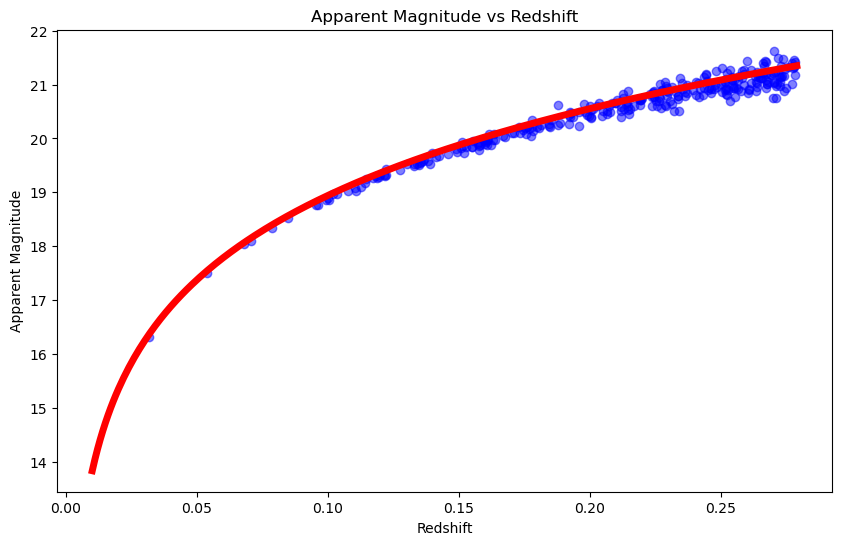

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Redshift'], data['AppMag'],marker='o', color='blue', alpha=0.5, label = 'Original' )
plt.plot(data1['redshift_range'], data1['app_mag'], color='red', alpha=1,linewidth=5, label = 'estimated')
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift')
plt.show()

In [20]:
#conversion of pandas series to numpy
data_new = data [ ['Redshift', 'AppMag', 'DAppMag']].to_numpy()
z = data_new[:, 0]
app_mags = data_new[:, 1]
absolute_magnitudes = -19.5
sigma=data_new[:,2]

In [21]:
#defining luminosity function for best fit
def luminosity_best(z,H0,Om0):
    cosmo = FlatLambdaCDM(H0,Om0)
    return cosmo.luminosity_distance(z).value

In [22]:
#defining apparent magnitude function for best fit
def app_mag_best(z, H0, Om0):
    dL=luminosity_best(z,H0,Om0)
    return -19.5 + 5 * np.log10(dL* 10 ** 6) - 5

In [23]:
#Obtaining best fit parameters
popt, pcov = curve_fit(app_mag_best, z, app_mags, p0=[H0_I, 0.5], sigma = sigma)

In [24]:
#Best parameter produced
H0, Om0  = popt

In [25]:
#conversion of pandas series into numpy
data_new1 = data1[ ['luminosity_distance', 'app_mag', 'redshift_range']].to_numpy() 
luminosity_distances = data_new1[:, 0]
app_mag = data_new1[:, 1]
absolute_magnitudes = -19.5
redshift_ranges=data_new1[:,2]

In [26]:
#To get the apparent magnitude using the best fit cosmological paramters
cosmo_best = FlatLambdaCDM(H0=H0, Om0=Om0)
app_mag_best = -19.5 + 5 * np.log10(cosmo_best.luminosity_distance(redshift_ranges).value * 1e6) - 5

In [27]:
#error in Hubble constant and Matter density
uncertainity_H0, uncertainity_Om0 =np.sqrt(np.diag(pcov))

In [28]:
#Best fit value for dark matter
Ode0 = cosmo_best.Ode0
#uncertainity in energy density can be similar to that of matter density in a flat universe

### Best Fit cosmological parameters

In [29]:
print(H0 ,'+-', uncertainity_H0)
print(Om0 ,'+-', uncertainity_Om0)
print(Ode0)

66.00091765871623 +- 0.09370941135281188
0.693593426691745 +- 0.02817287957921158
0.30640657330825505


## Plot with Original, estimated and best fit models

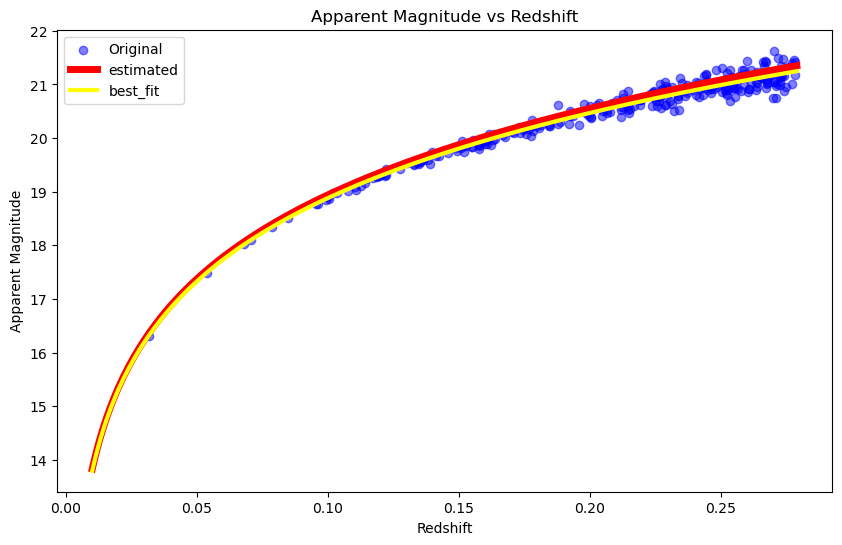

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Redshift'], data['AppMag'],marker='o', color='blue', alpha=0.5, label = 'Original' )
plt.plot(data1['redshift_range'], data1['app_mag'], color='red', alpha=1,linewidth=5, label = 'estimated')
plt.plot(redshift_ranges,app_mag_best,alpha=1,color='yellow',linewidth=3,label='best_fit')
plt.xlabel('Redshift')
plt.ylabel('Apparent Magnitude')
plt.title('Apparent Magnitude vs Redshift')
plt.legend()
plt.show()